# Аналіз частоти слів на новинних сайтах з використанням Selenium (7 балів)

## Мета Лабораторної Роботи:
Розвинути навички використання Selenium для збору даних з веб-сторінок.
Практично застосувати Python для аналізу текстових даних і виявлення тенденцій.

## Завдання Лабораторної Роботи:
### Опис Завдання:
Створити скрипт на Python, який використовує Selenium для аналізу частоти зустрічання слів на обраних новинних сайтах за різні місяці та роки.

### Етапи Виконання:
1. Вибір Сайтів для Аналізу: Оберіть кілька новинних сайтів (наприклад, bbc.com, cnn.com).
2. Розробка Скрипта:
    - Ініціалізуйте WebDriver для керування браузером.
    - Налаштуйте скрипт для відвідування архівних розділів обраних сайтів по місяцям та рокам.
    - Зберіть тексти новин за кожен період.
    - Проаналізуйте тексти, визначаючи частоту кожного слова.
3. Аналіз Даних:
    - Порівняйте найбільш часто зустрічаючіся слова в різні місяці та роки.
    - Визначте, які слова були популярні у певні періоди часу.
4. Висновок Результатів:
    - Візуалізуйте результати у вигляді графіків або таблиць.
    - Сформулюйте висновки про динаміку популярності слів у новинній сфері.

## Особливі Вказівки:
- Враховуйте виключно зміст новинних статей, виключаючи коментарі, рекламу та неновинні матеріали.
- Забезпечте коректну обробку тексту, включаючи нормалізацію та очищення від знаків пунктуації та спеціальних символів.


links to process ['https://varta1.com.ua/news/pid-chas-pozhezhi-u-harkovi-u-vlasnij-oseli-zagynulo-podruzhzhya-foto_98349.html', 'https://varta1.com.ua/news/zyma-povertayetsya-u-lvovi-ta-oblasti-prognozuyut-rizke-pogirshennya-pogodnyh-umov_98358.html', 'https://varta1.com.ua/news/u-likarni-lvova-pomer-odyn-iz-postrazhdalyh-vnaslidok-vybuhu-na-rizdvyanomu-yarmarku_98355.html', 'https://varta1.com.ua/news/u-zaporizhzhi-cherez-petardu-yaku-zapustyly-z-vulytsi-gorila-kvartyra-u-bagatopoverhivtsi-foto_98343.html', 'https://varta1.com.ua/news/v-oblasnij-politsiyi-opratsyuvaly-bilshe-1000-zvernen-vid-gromadyan-u-novorichnu-nich_98317.html', 'https://varta1.com.ua/news/majzhe-300-zavdan-opratsyuvaly-patrulni-u-novorichnu-nich_98314.html', 'https://varta1.com.ua/news/z-1-sichnya-subsydiyi-na-komunalku-nadavatymut-u-groshovij-formi_98304.html', 'https://varta1.com.ua/news/motoroshna-dtp-naperedodni-novogo-roku-ne-rozmynulysya-dva-busy-ye-postrazhdalyj-foto_98301.html', 'https://varta1.com.ua/new

['31 грудня, о 13:33 год., до Служби порятунку «101» надійшло повідомлення про пожежу в одноповерховому житловому будинку барачного типу на 4 квартири, що на вул. Молодіжній, 11, у селі Роздольне, Зміївського району, Харківської області.\n\nПро це пише прес-служба ГУ ДСНС України у Харківській області. \n\nДо місця виклику негайно вирушив районний пожежно-рятувальний підрозділ ДСНС, у складі 1 відділення на пожежній автоцистерні. Подолавши відстань у 37 км, рятувальники прибули на пожежу. На той момент горіла вже половина будинку, включно з дахом. Частина даху та перекриття вже була зруйнована. Площа пожежі склала 70 кв. м. Під час обстеження внутрішніх приміщень, вогнеборці виявили тіла двох загиблих осіб, які були подружжям: чоловіка, 1972 року народження, та жінку, 1973 року народження.\n\n[gallery ids=«98353,98352,98351,98350»]\nРятувальники локалізували пожежу о 14:40 год. та повністю ліквідували її о 17:33 год.\n\nЗа попередньою інформацією, причиною загоряння могло стати порушен

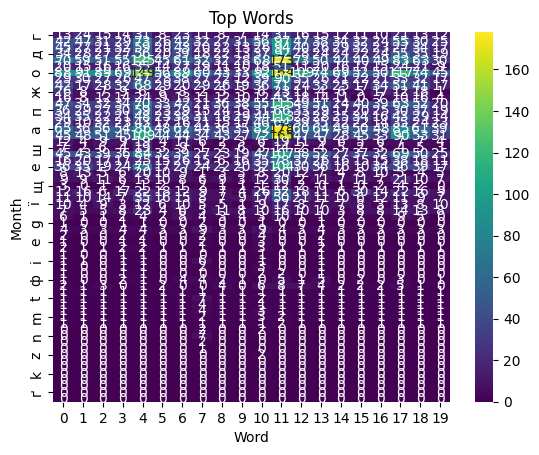

In [28]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

driver = webdriver.Chrome()

format_link = lambda y, m, d: f"https://varta1.com.ua/archive/{y}-{m}-{d}/"

textes = []
def process_page_news_page(href: str):
    #Відкриває браузер і переходить за вказаним посиланням 
    driver.get(href)
    #Починається блок обробки помилок. Всі команди виконуються в цьому блоку, і якщо виникає помилка, виконується відповідний блок except.
    try :
        print('processing', href)
        #Знаходить елемент на сторінці за допомогою CSS-селектора. У цьому випадку це елемент з тегом <main>, який зазвичай представляє основну частину веб-сторінки.
        main = driver.find_element(By.CSS_SELECTOR, "main")
        #Отримує текст знайденого елементу і зберігає його в змінну
        text = main.text
        #Повернення на попередню сторінку
        driver.back()
        return text
    except:
        driver.back()
        return ""

def process_page_news():
    #Знаходить всі елементи <a> (посилання) виразу div#categories article.post, які є дочірніми елементами сторінки, та отримує їхні атрибути href. Результат зберігається у списку links. Це використовує синтаксис спискового включення.
    links = [a for a in driver.find_elements(By.CSS_SELECTOR, "div#categories article.post > a[href]")]
    print('links to process', [a.get_attribute("href") for a in links])
    for link in links:
        #Отримує атрибут href для поточного елемента в циклі.
        href = link.get_attribute("href")
        #икликає функцію process_page_news_page, передаючи їй поточне посилання. Отриманий текст новини зберігається в змінній text
        text = process_page_news_page(href)
        textes.append(text)
#Період з якого по який нам потрібно брати дані
for year in [2019]:
    for month in [1, 2, 3]:
        driver.get(format_link(year, month, 1))
        process_page_news()
        
display(textes)

'''
Ітерує по кожному символу у вхідному рядку text та перетворює його в нижній регістр.

Використовує функцію join(), щоб об'єднати всі символи у форматі рядка.

Всі пробіли та символи виключаються з вхідного рядка перед тим, як відбудеться його об'єднання.
'''
def process_text(text):
    return " ".join(word.lower() for word in text if word.isalpha())
'''
Функція count_word_frequency бере вхідний аргумент text і повертає словник word_counts.

Використовує функцію split(), щоб розділити текст на слова.

Ініціалізує порожній словник word_counts.

Ітерує по кожному слову у списку слів words та додає його в словник word_counts. Якщо слово вже існує в словнику, збільшує значення ключа на одиницю, інакше, додає слово в словник з значенням 1.

Повертає словник word_counts.
'''
def count_word_frequency(text):
    words = text.split()
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

'''
Створює порожній список word_frequencies.

Ітерирує по кожному тексту в списку текстів textes та виконує наступні дії:

1. Нормалізує текст, використовуючи функцію process_text.

2. Рахує частоту кожного слова в нормалізованому тексті, використовуючи функцію count_word_frequency.

3. Додає результат (словник з частотами слів) в список word_frequencies.

Перетворює список word_frequencies в датафрейм word_frequencies_df.

Зліва та справа відриває дюжину слів з датафрейма, записуючи їх у датафрейм top_words.

Виводить у вигляді список слів top_words та датафрейм word_frequencies_df як матрицю з інтенсивностями кольорів, закодованими значеннями частот слів.
'''
def analyze_data(textes):
    word_frequencies = []
    for text in textes:
        processed_text = process_text(text)
        word_counts = count_word_frequency(processed_text)
        word_frequencies.append(word_counts)

    word_frequencies_df = pd.DataFrame(word_frequencies)
    #  astype(int) перетворення в цілі числа
    word_frequencies_df = word_frequencies_df.fillna(0).astype(int)
    '''
    by=word_frequencies_df.columns[-1] - сортуємо за значенням останньої колонки
    
    ascending=False - сортуємо по спаданню
    '''
    word_frequencies_df.sort_values(by=word_frequencies_df.columns[-1], ascending=False)
    word_frequencies_df
    
#Вибірка перших 20 рядків з DataFrame word_frequencies_df
    top_words = word_frequencies_df.head(20)
    #Створення теплової карти з допомогою бібліотеки. top_words.T транспонує (перевертає) дані, оскільки зазвичай seaborn очікує, що мітки по осі Y будуть на вертикальній осі. annot=True включає анотації (текстові значення) на кожній ячейці. fmt='d' вказує, що значення в ячейках мають бути цілими числами. cmap='viridis' вказує кольорову мапу для відображення даних.
    sns.heatmap(top_words.T, annot=True, fmt='d', cmap='viridis')
    plt.title('Top Words')
    plt.xlabel('Word')
    plt.ylabel('Month')
    plt.show()

analyze_data(textes)

driver.close()
